# Chess game result prediction

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Parameter for the game:

In [3]:
# Ratings (player 1 and player 2)
R1 = 1825
R2 = 1775


In [4]:
# rating difference
rd = R1 - R2
print('Rating difference rd = {}'.format(rd))

# rating average
ra = (R1 + R2)/2
print('Rating average ra = {}'.format(ra))

Rating difference rd = 50
Rating average ra = 1800.0


## Draw rate
The rate of drawing depends of Rating Differece $rd$ and the Rating Average $ra$. At lower $rd$ and greater $ra$ the probability of a draw increases.

According to http://kirill-kryukov.com/chess/kcec/draw_rate.html we can create a function to get the draw rate $dr$:

In [20]:
def get_draw_rate(R1, R2):
    rd = np.abs(R1 - R2)
    ra = (R1 + R2)/2
    
    dr = -rd/32.49 + np.exp((ra-2254.7)/208.49)+23.87
    return dr/100

In [21]:
dr = get_draw_rate(R1, R2)
print('Drawing Rate dr = {:0.2f} %'.format(dr*100))

Drawing Rate dr = 22.44 %


## Game result expectation
The probability that Player 1 wins is $P_{W1}$ is:
$$
P_{W1} = \frac{1}{1 + 10^{\frac{-rd}{400}}} - \frac{1}{2}dr
$$
The probability that Player 1 loses is $P_{L1}$ is:
$$
P_{L1} = \frac{1}{1 + 10^{\frac{rd}{400}}} - \frac{1}{2}dr
$$

In [22]:
def get_result_expectation(R1, R2):
    rd = R1 - R2
    dr = get_draw_rate(R1, R2)
    
    Pw = 1 / (1 + np.power(10, -1*rd/400)) - 0.5*dr
    Pl = 1 / (1 + np.power(10, rd/400)) - 0.5*dr
    Pd = dr
    return Pw, Pl, Pd

In [23]:
Pw1, Pl1, Pd1 = get_result_expectation(R1, R2)

print('Player 1 (ELO = {}):'.format(R1))
print('\tWin chances = {:0.2f} %'.format(Pw1*100))
print('\tLose chances = {:0.2f} %'.format(Pl1*100))
print('\tDraw chances = {:0.2f} %'.format(Pd1*100))

Player 1 (ELO = 1825):
	Win chances = 45.92 %
	Lose chances = 31.63 %
	Draw chances = 22.44 %


In [24]:
Pw2, Pl2, Pd2 = get_result_expectation(R2, R1)

print('Player 2 (ELO = {}):'.format(R2))
print('\tWin chances = {:0.2f} %'.format(Pw2*100))
print('\tLose chances = {:0.2f} %'.format(Pl2*100))
print('\tDraw chances = {:0.2f} %'.format(Pd2*100))

Player 2 (ELO = 1775):
	Win chances = 31.63 %
	Lose chances = 45.92 %
	Draw chances = 22.44 %


## Probabilities vs ELO rate difference
The probabilities curves are calculated depending of $ra$ value.

In [44]:
rd_min = -600
rd_max = 600
N = 1000

rd_vals = np.linspace(rd_min, rd_max, N)
R1_vals = R1*np.ones(rd_vals.shape)
R2_vals = R1 - rd_vals

Pw, Pl, Pd = get_result_expectation(R1_vals, R2_vals)

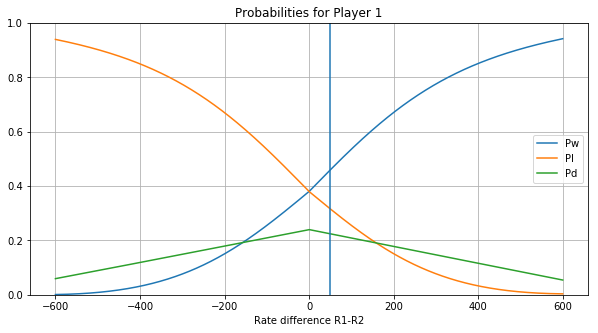

In [46]:
plt.figure(figsize=(10,5))
plt.plot(rd_vals, Pw, label='Pw')
plt.plot(rd_vals, Pl, label='Pl')
plt.plot(rd_vals, Pd, label='Pd')
plt.grid()
plt.legend()
plt.ylim(0,1)
plt.title('Probabilities for Player 1')
plt.xlabel('Rate difference R1-R2')
plt.axvline(x=rd)
plt.show()

Other interesting links:

https://wismuth.com/elo/calculator.html

https://chess-db.com/public/research/draw_rate.html

http://kirill-kryukov.com/chess/kcec/draw_rate.html
